## Process the data

In [2]:
import pandas as pd
from dateutil.parser import parse
df_sum = pd.read_csv('sum.csv')
df_sum = df_sum.set_index(df_sum['datetime'].apply(parse)).drop('datetime',axis=1).resample('2M').aggregate('sum')
df_gt = pd.read_csv('googletrends.csv')
df_gt = df_gt.set_index(df_gt['month'].apply(parse)).drop('month',axis=1).resample('1M').aggregate('sum')

## Use default colormap

Text(0.5,1,'Global Data Journalist Google Trend Index')

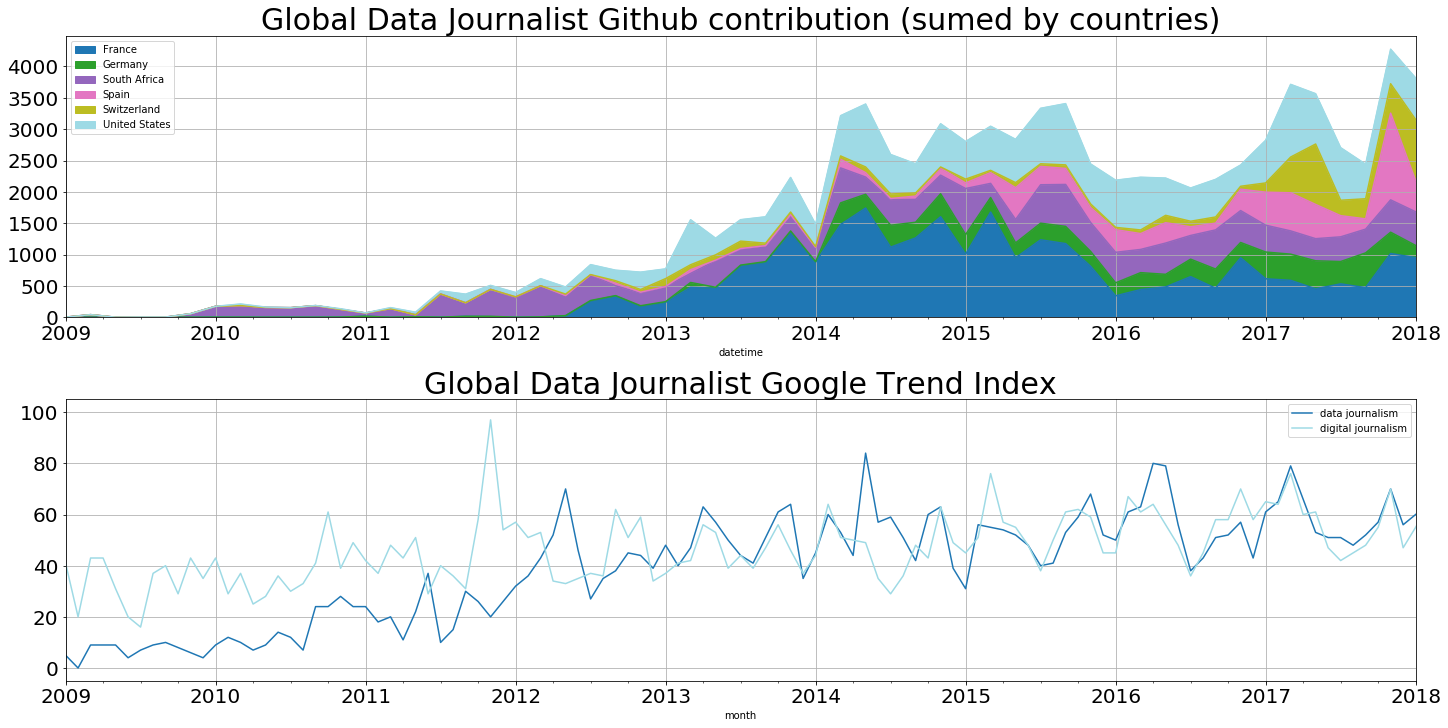

In [5]:
from matplotlib import colors as mcl
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1,constrained_layout=True)
ax0 = df_sum.plot.area(
    fontsize = 20,
    grid = True,
    figsize = (20,10),
    colormap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[0])
ax0.set_title('Global Data Journalist Github contribution (sumed by countries)', fontsize=30)

ax1 = df_gt.plot.line(
    fontsize = 20,
    grid = True,
    figsize = (20,10),
    colormap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[1])
ax1.set_title('Global Data Journalist Google Trend Index', fontsize=30)

## Create a new colormap

In [6]:
colors = [
    [0.0, '#FDFCF3'],
    [0.25, "beige"],
    [1.0, "skyblue"],
]
newcmp = mcl.LinearSegmentedColormap.from_list("", colors)

### check the new colormap's colorbar

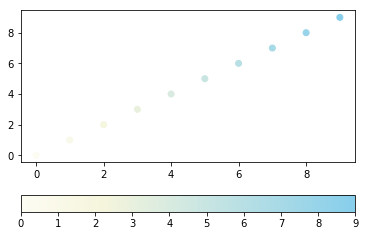

In [7]:
from matplotlib import pyplot as plt
from matplotlib import colors as mcl

fig, ax=plt.subplots()
x = range(10)
y = range(10)
sc = ax.scatter(x,y, c=y, cmap=newcmp)
fig.colorbar(sc, orientation="horizontal")
plt.show()

Text(0.5,1,'Global Data Journalist Google Trend Index')

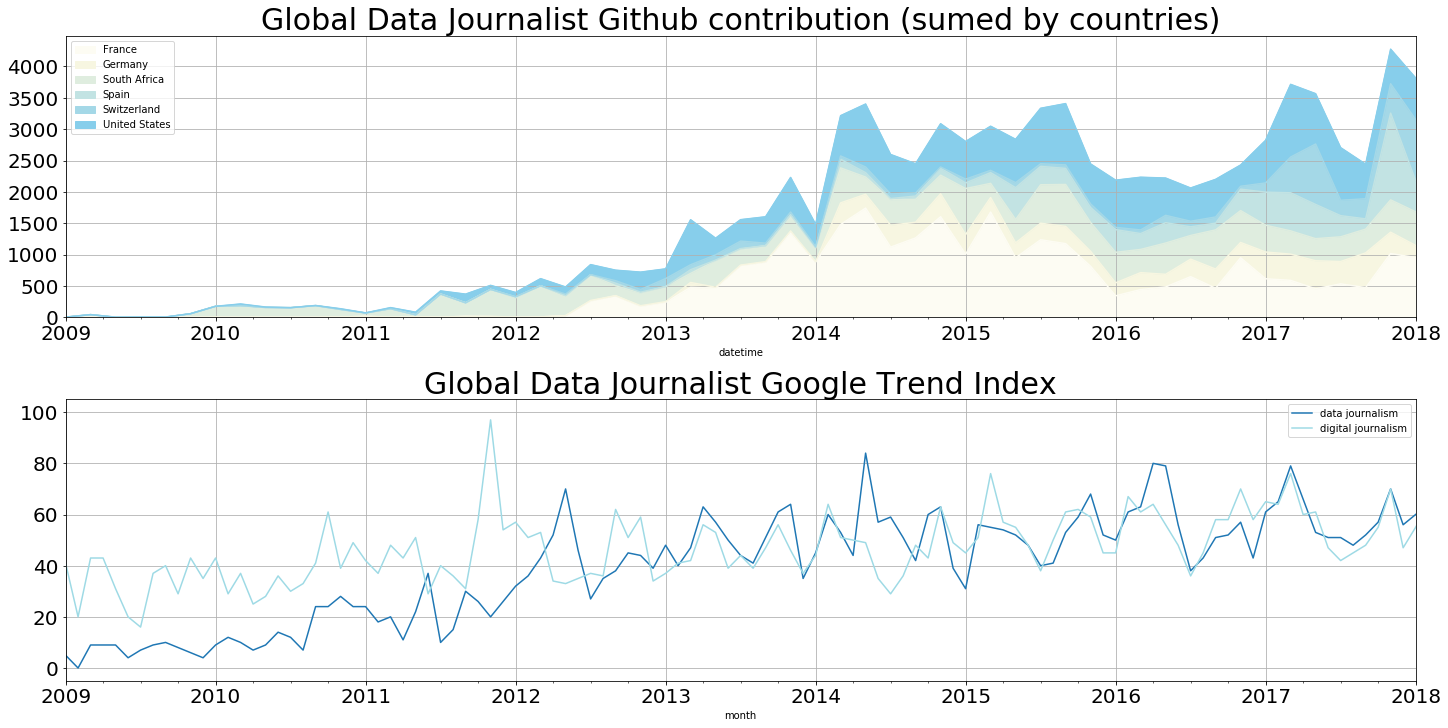

In [8]:
from matplotlib import colors as mcl
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1,constrained_layout=True)

ax0 = df_sum.plot.area(
    fontsize = 20,
    grid = True,
    figsize = (20,10),
    colormap = newcmp,
    xlim = ('2009','2018'),
    ax=axes[0])
ax0.set_title('Global Data Journalist Github contribution (sumed by countries)', fontsize=30)

ax1 = df_gt.plot.line(
    fontsize = 20,
    grid = True,
    figsize = (20,10),
    colormap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[1])
ax1.set_title('Global Data Journalist Google Trend Index', fontsize=30)

## Change the default colormap
### check which colormaps can be used

In [9]:
import matplotlib.cm as cm
cm.cmap_d.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral

### check the original colormap's parameters and effects

[[0.03137255 0.18823529 0.41960784 1.        ]
 [0.12941176 0.44313725 0.70980392 1.        ]
 [0.41960784 0.68235294 0.83921569 1.        ]
 [0.77647059 0.85882353 0.9372549  1.        ]
 [0.96862745 0.98431373 1.         1.        ]]


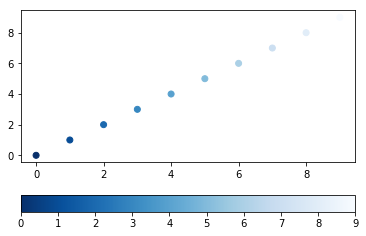

In [10]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
Blues_r = cm.get_cmap('Blues_r', 5)
print(Blues_r(range(5)))

from matplotlib import pyplot as plt
fig, ax=plt.subplots()
x = range(10)
y = range(10)
sc = ax.scatter(x,y, c=y, cmap='Blues_r')
fig.colorbar(sc, orientation="horizontal")
plt.show()

### generate a new colormap from an original one
*the original color map ends with an almost pure white, which means a display problem on white backgrounds.*

In [26]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
Blues_r = cm.get_cmap('Blues_r', 6)  #first get a model of colormap
newcolors = Blues_r(np.linspace(0, 1, 6))  #divide this map into 6 sectors
c6 = np.array([235/256, 240/256, 250/256, 1])  #use xxx/256 because this is RGB scale
newcolors[5:6, :] = c6  #this part of cmap is too light, exchange it with c6
newcmp = ListedColormap(newcolors)

Text(0.5,1,'Global Data Journalist Google Trend Index')

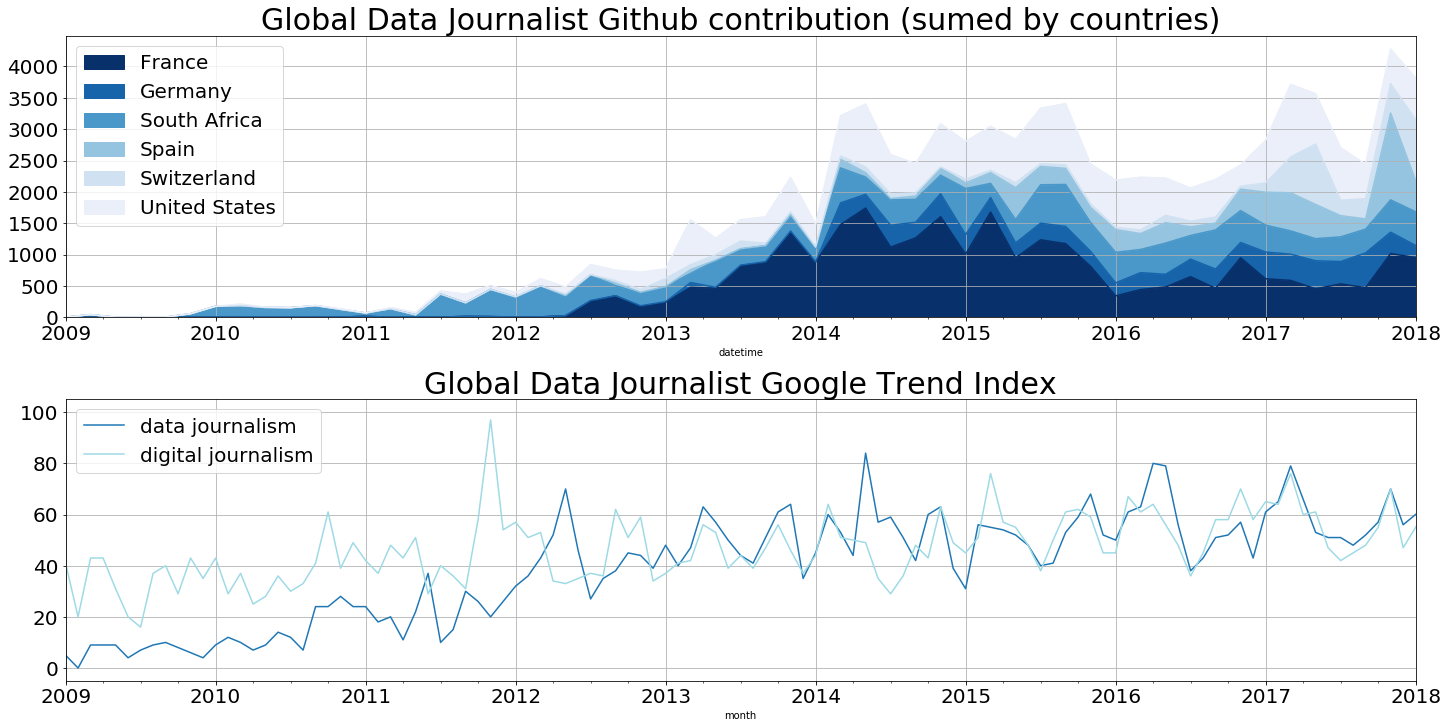

In [38]:
from matplotlib import colors as mcl
from matplotlib import pyplot as plt
plt.rc('legend',fontsize='20')
fig, axes = plt.subplots(nrows=2, ncols=1,constrained_layout=True)

ax0 = df_sum.plot.area(
    fontsize = 20,
    grid = True,
    legend = True,
    figsize = (20,10),
    colormap = newcmp,
    xlim = ('2009','2018'),
    ax=axes[0])
ax0.set_title('Global Data Journalist Github contribution (sumed by countries)', fontsize=30)

ax1 = df_gt.plot.line(
    fontsize = 20,
    grid = True,
    figsize = (20,10),
    colormap = 'tab20',
    xlim = ('2009','2018'),
    ax=axes[1])
ax1.set_title('Global Data Journalist Google Trend Index', fontsize=30)

## See the difference

Text(0.5,1,'oldcmp')

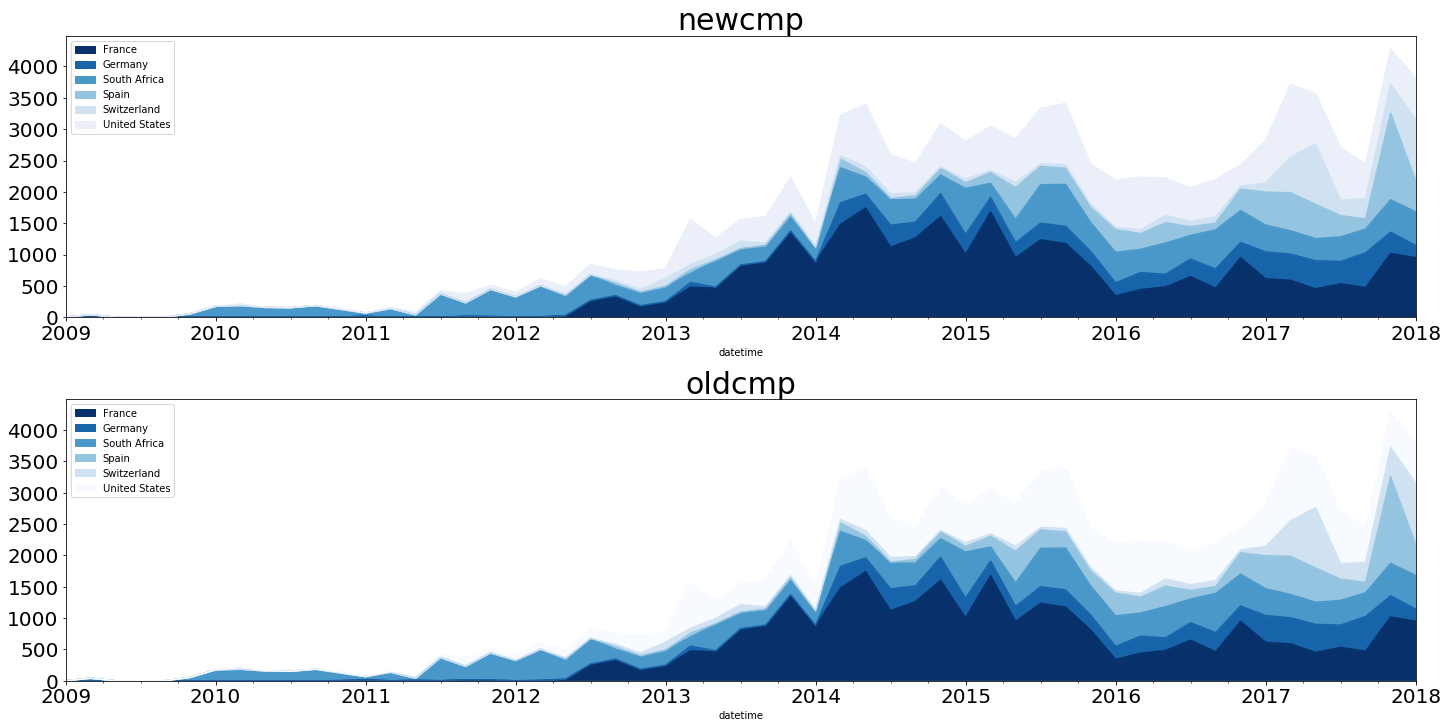

In [28]:
from matplotlib import colors as mcl
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1,constrained_layout=True)

ax0 = df_sum.plot.area(
    fontsize = 20,
    legend = True,
    figsize = (20,10),
    colormap = newcmp,
    xlim = ('2009','2018'),
    ax=axes[0])
ax0.set_title('newcmp', fontsize=30)

ax1 = df_sum.plot.area(
    fontsize = 20,
    legend = True,
    figsize = (20,10),
    colormap = 'Blues_r',
    xlim = ('2009','2018'),
    ax=axes[1])
ax1.set_title('oldcmp', fontsize=30)

### another way to check the difference between the previous and changed colormaps

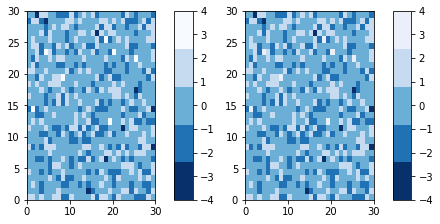

In [21]:
def plot_examples(cms):
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()
plot_examples([viridis, newcmp])